In [186]:
a,b = zip([1,2],[3,4])
print(a,b)

(1, 3) (2, 4)


2652


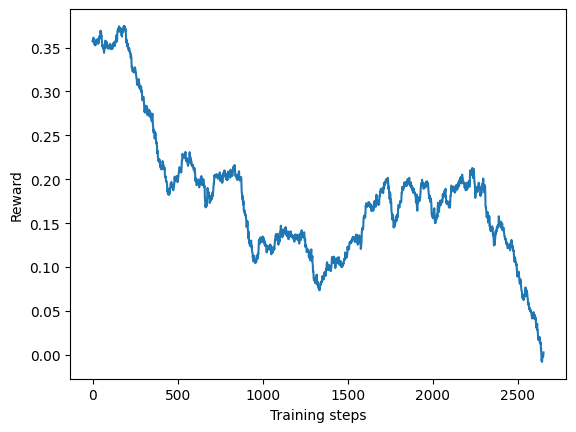

In [209]:


import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
with open("reward_number.txt", "r") as f:
    r = f.readlines()
r = [float(i) for i in r][:]
print(len(r))
moving_avg = []
ma = sum(r[:200])/200
ratio=1-10/len(r)
for x in r:
    ma = ratio * ma + (1-ratio) * x
    moving_avg.append(ma)

plt.ylabel("Reward")
plt.xlabel("Training steps")
plt.plot(moving_avg)
plt.show()

In [224]:

def compute_gae(rewards, values, dones, next_value):
    # rewards shape: (sequence_length,)
    # values shape: (sequence_length,)
    # dones shape: (sequence_length,)
    # next_value shape: scalar

    values = values + [next_value,]  # Shape: (sequence_length + 1,)
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + 0.99 * values[step + 1] * (1 - dones[step]) - values[step]  # Shape: scalar
        gae = delta + 0.99 * 0.95 * (1 - dones[step]) * gae  # Shape: scalar
        returns.insert(0, gae + values[step])  # Shape: scalar
    return returns  # Shape: (sequence_length,)
values = [1]*60

for i in range(10):
    values = compute_gae([0,0,1,0,0,2]*10, values, [0]*59+[1], 0)
    print(values)

[10.490015249999999, 5.890500000000003, 1.0, 11.3745555, 6.831000000000003, 2.0]
[1.2226747499999995, 0.9900000000000002, 1.0, 2.2003245000000007, 1.9800000000000004, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
[0.9801, 0.99, 1.0, 1.9602, 1.98, 2.0]
